In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv("city_data.csv")
ride_data=pd.read_csv("ride_data.csv")
#print(city_data)

#combine data 
rideshare_df=pd.merge(ride_data, city_data, on="city", how="left")



#remove duplicate city info from the city data
riseshare_df = rideshare_df.drop_duplicates('city')
rideshare_df.head()




,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

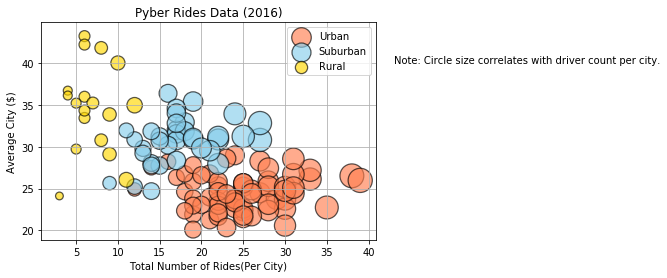

In [20]:
# Obtain the x and y coordinates for each of the three city types
grouped = rideshare_df.groupby('city').agg({'fare': 'mean','ride_id': 'count', 'driver_count':'first', 'type':'first'})

#City Catagories
urban = grouped.loc[grouped["type"]== "Urban"]
suburban = grouped.loc[grouped["type"]== "Suburban"]
rural = grouped.loc[grouped["type"]== "Rural"]

#Scatter plot info and colors---Somehow the hardest part for me :(
plt.scatter(urban["ride_id"], urban["fare"], color = "coral", edgecolors="black", s = urban["ride_id"]*15, label = "Urban", alpha = 0.65, linewidth = 1.25)
plt.scatter(suburban["ride_id"], suburban["fare"], color = "skyblue", edgecolors ="black", s = suburban["ride_id"]*20, label = "Suburban", alpha = 0.65, linewidth = 1.25)
plt.scatter(rural["ride_id"], rural["fare"], color = "gold", edgecolors = "black", s = rural["ride_id"]*20, label = "Rural", alpha = 0.65, linewidth = 1.25)


#labels :) My Favorite Part!
plt.title("Pyber Rides Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average City ($)")
plt.text(43, 40,"Note: Circle size correlates with driver count per city.")

# Create a legend
plt.legend(loc= "upper right")

#Incorporate a text label regarding circle size

#plt.tight_layout()
plt.grid(True)


In [18]:
#plt.savefig("Pyber Ride Data.png")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

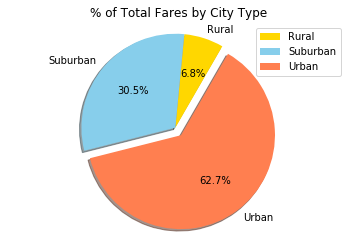

In [11]:
# Calculate Type Percents
fare_pie=rideshare_df.groupby(["type"])["fare"].sum()
fare_pie

# Build Pie Chart
colors=["gold", "skyblue", "coral"]
labels=["Urban", "Rural", "Suburban"]
explode=[0,0,0.1]

plt.title("% of Total Fares by City Type")
plt.pie(fare_pie, explode=explode, labels=fare_pie.index, colors=colors, 
       autopct="%1.1f%%", shadow=True, startangle=60)
plt.axis('equal')

#legend
plt.legend(loc="upper right")



#Show Figure
plt.show()



In [16]:
#plt.savefig("Fares by City.png")

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

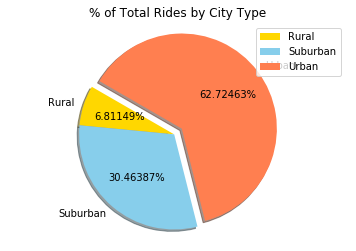

In [12]:
# Calculate Ride Percents
ride_pie=rideshare_df.groupby(["type"])["ride_id"].sum()
ride_pie

# Build Pie Chart
colors=["gold", "skyblue", "coral"]
labels=["Urban", "Rural", "Suburban"]
explode=[0,0,0.1]

plt.title("% of Total Rides by City Type")
plt.pie(fare_pie, explode=explode, labels=ride_pie.index, colors=colors, 
       autopct="%1.5f%%", shadow=True, startangle=150)
plt.axis('equal')

#legend
plt.legend(loc="upper right")

# Show Figure
plt.show()


In [15]:
#plt.savefig("Rides by City.png")

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

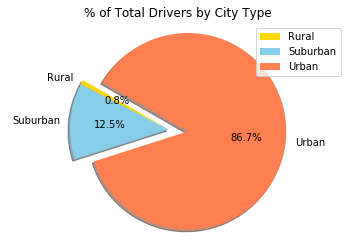

In [13]:
# Calculate Ride Percents
driver_pie=rideshare_df.groupby(["type"])["driver_count"].sum()
driver_pie

# Build Pie Chart
colors=["gold", "skyblue", "coral"]
labels=["Urban", "Rural", "Suburban"]
explode=[0,0,0.2]

plt.title("% of Total Drivers by City Type")
plt.pie(driver_pie, explode=explode, labels=driver_pie.index, colors=colors, 
       autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis('equal')

#legend
plt.legend(loc="upper right")

# Show Figure
plt.show()

In [14]:
#plt.savefig("Drivers by City.png")

<Figure size 432x288 with 0 Axes>